In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!cp "/content/drive/MyDrive/Colab Notebooks/steps_vs_cal.csv" "/content/"

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [40]:
dataset = pd.read_csv('steps_vs_cal.csv')
dataset = dataset[['step_count', 'calories_burned']]
dataset
# df.drop('date')

,step_count,calories_burned
0,5464,181
1,6041,197
2,25,0
3,5461,174
4,6915,223
...,...,...
91,133,4
92,153,0
93,500,0
94,2127,0


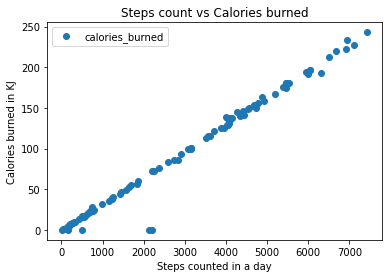

LinearRegression()

In [49]:
# step_count = df['step_count']
# calories_burned = df['calories_burned']

# step_count = step_count.to_numpy()
# calories_burned = calories_burned.to_numpy()

dataset.plot(x='step_count', y='calories_burned', style='o')
plt.title('Steps count vs Calories burned')
plt.xlabel('Steps counted in a day')
plt.ylabel('Calories burned in KJ')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
plt.show()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)



In [50]:
print('intercept: ', regressor.intercept_)
print('coeficient: ', regressor.coef_)
print('pearson correlation: ', np.corrcoef(dataset['step_count'], dataset['calories_burned']))

intercept:  -4.501301128591351
coeficient:  [0.03321682]
pearson correlation:  [[1.        0.9892597]
 [0.9892597 1.       ]]


From the above graph we can recongnise a few outliers, but majority of the data follows a simple trend of a linear relation.
We can simply say, there is a positive relationship betweeen steps walked and calories burned.
And judging from the linear regression coeficient we can see that it is 0.9892, it shows that the linear model is workable with the current dataset.



In [51]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({ 'Actual': y_test, 'Predicted': y_pred})
df


,Actual,Predicted
0,141,142.815282
1,99,97.341459
2,0,-3.670881
3,116,115.344974
4,125,126.406174
5,180,179.420214
6,6,1.510943
7,21,17.122847
8,220,217.254168
9,25,22.038936


The following table shows calories burned in kJ when a certain amount of steps are taken, in predicted values and actual values.

In [57]:
y_pred = regressor.predict(dataset[['step_count']].to_numpy()) #to predict other amount of steps walked, please replace what is in the initial ()s !
df = pd.DataFrame({ 'Steps count': dataset['step_count'].to_numpy(),'Actual': dataset['calories_burned'].to_numpy(), 'Predicted': y_pred})
df

,Steps count,Actual,Predicted
0,5464,181,176.995386
1,6041,197,196.161489
2,25,0,-3.670881
3,5461,174,176.895736
4,6915,223,225.192987
...,...,...,...
91,133,4,-0.083464
92,153,0,0.580872
93,500,0,12.107107
94,2127,0,66.150868
